# Teoría de Algoritmos - Trabajo Práctico 1

In [1]:
import numpy as np

In [2]:
from google.colab import files
upload = files.upload()

Saving 3 elem.txt to 3 elem.txt
Saving 10 elem.txt to 10 elem.txt
Saving 100 elem.txt to 100 elem.txt
Saving 10000 elem.txt to 10000 elem.txt
Saving Tiempos optimos.txt to Tiempos optimos.txt


Tenemos que ayudar a Scaloni a analizar los próximos n rivales de la selección campeona del mundo. Como técnico perfeccionista, quiere analizar videos de cada uno de los rivales. Recibió un compilado por cada rival, y necesita hacer un análisis muy detallado, lo cual le implica tomar apuntes, analizar tácticas, ver cuándo hay que hacerle un masaje a Messi, etc… Para que el análisis sea detallado, cada compilado no lo revisa únicamente él, sino también un ayudante.

El análisis del rival i le toma  s(i) de tiempo a Scaloni, y luego ai al ayudante (independientemente de cuál ayudante lo vea). Lo bueno, es que después de los grandes logros obtenidos, Scaloni cuenta con n ayudantes (es decir, la misma cantidad que rivales), que pueden ver los videos completamente en paralelo. Siempre los ayudantes podrán ver los videos después que Scaloni haya terminado de verlo y analizarlo como corresponde (esto no lo delega). Cuando llega la hora que un ayudante lo vea, puede ser cualquiera, pero sólo uno lo verá (no hay ganancia en que dos lo vean).

El DT necesita que los rivales estén todos con sus correspondientes análisis lo antes posible, y por eso te pide que lo ayudes. Dice que confía en vos. Sabe que no lo vas a dejar tirado.

En criollo, tenemos a X que le toma S(i) tiempo ahcer la tarea i.
analisis terminados= [] y de estos los ayudantes agarran a ver y A los ayudantes le cuesta A(i) tiempo



In [3]:
def read_sample(filename):
  return np.loadtxt(
    filename,
    usecols=(0, 1), delimiter=',',
    dtype={'names': ('S_i', 'A_i'),
                     'formats': ('i4', 'i4')},
    skiprows=1,
)


In [4]:
def scaloni_greedy_sort(times):
  return sorted(times, key=lambda x: x[1], reverse=True)


def scaloni_greedy_best_time(times):
  s_time = 0
  a_time = 0
  max_time = 0
  for scaloni, ayudante in times:
    s_time += scaloni
    new_a_time = s_time + ayudante
    max_time = max(a_time, new_a_time)
    a_time = new_a_time

  return max_time


def scaloni_greedy(times):
  times_sorted = scaloni_greedy_sort(times)

  return scaloni_greedy_best_time(times_sorted)



In [5]:
sample = read_sample('10 elem.txt')

scaloni_greedy(sample)

29

In [6]:
scaloni_greedy([(10, 100), (90, 1)])

110

In [7]:
files = ['3 elem.txt', '10 elem.txt', '100 elem.txt', '10000 elem.txt']

for f in files:
  sample = read_sample(f)

  print(scaloni_greedy(sample))

10
29
5223
497886735


## Generación sets

In [186]:
rng = np.random.default_rng(seed=42)
def generate_random(n, lower_limit=1, upper_limit=20):
  s = rng.integers(lower_limit, upper_limit, size=n)
  a = rng.integers(lower_limit, upper_limit, size=n)
  return [(s[i], a[i]) for i in range(0, len(s))]

In [187]:
sample_random = generate_random(5)

In [188]:
sample_random

[(2, 17), (15, 2), (13, 14), (9, 4), (9, 2)]

In [189]:
scaloni_greedy(sample_random)

50

TODOs:
- Agregar gráfico para comparar con distintos N y ver la complejidad del algoritmo visualmente (debería ser una curva simil n log(n)


In [190]:
import time
import matplotlib.pyplot as plt

In [191]:
def timeit_scaloni(sample):
  start_time = time.time()
  scaloni_greedy(sample)
  end_time = time.time()
  return end_time - start_time

In [192]:
data_n = []
data_time = []

inicio_rango = 10
fin_rango = 75000
incremento = 10

for n in range(inicio_rango, fin_rango + 1, incremento):
    # Genera tus datos o carga datos de alguna fuente
    data = generate_random(n)  # Ajusta esto según tu caso

    timeit = timeit_scaloni(data)

    data_n.append(n)
    data_time.append(timeit*1000)


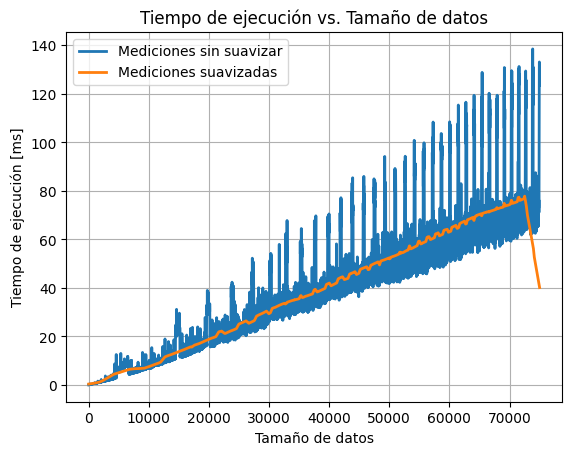

In [195]:
import math
window_size = 500

x = data_n
y = data_time

y_suavizado = np.convolve(y, np.ones(window_size)/window_size, mode='same')

plt.plot(x, y, label='Mediciones sin suavizar', linewidth=2)
plt.plot(x, y_suavizado, label='Mediciones suavizadas', linewidth=2)
# plt.plot(x, [n*math.log2(n)/10000 for n in x], label='nlogn', linewidth=2)
plt.title('Tiempo de ejecución vs. Tamaño de datos')
plt.xlabel('Tamaño de datos')
plt.ylabel('Tiempo de ejecución [ms]')
plt.grid(True)
plt.legend()
plt.show()